<a href="https://colab.research.google.com/github/1dhiman/100days-ml/blob/master/2019/2_Dynamic_Pricing_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How does time influences the purchasing of a ticket to theatre?

The rate at which people purchase their tickets follows a stochastic arrival process, which evolves over time while undergoing chance fluctuations in the form of a poisson distribution.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def get_exp_dist(mbt = 7, size = 10_000):
    """
    returns array of booking times
    """
    
    np.random.seed(1)
    bookings = np.random.exponential(mbt+1, size)
    
    return bookings

To demonstrate, assume that the mean booking time (mbt) of an audience is 7 days

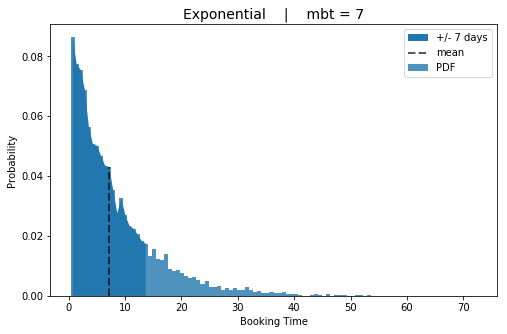

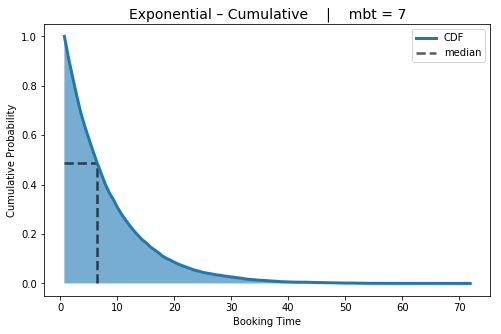

In [3]:
mbt=7
bookings = get_exp_dist(mbt=mbt)

prob, x = np.histogram(bookings, bins=100)
prob = np.divide(prob, prob.sum())
x = x[1:]
idx = np.sum(x<=mbt)

plt.figure(figsize=(8,5))
plt.title(f'Exponential    |    mbt = {int(bookings.mean())}', size =14)

# Plot the stuff
plt.bar(x, prob, width= x[1]-x[0],color='#2377ae',alpha=0.80, label = 'PDF')
plt.fill_between(x,prob,0,where=x<14, label=f'+/- {mbt} days')

# Add annotations + labels
plt.vlines(x[idx],0,prob[idx], colors='black', linestyles='--', linewidth=2.0, alpha=0.65, label = 'mean')
plt.xlabel('Booking Time')
plt.ylabel('Probability')
plt.legend()

plt.show()

# ---------------------------

cum_prob = np.cumsum(prob[::-1])[::-1]

plt.figure(figsize=(8,5))
plt.title(f'Exponential – Cumulative    |    mbt = {mbt}', size =14)
plt.plot(x, cum_prob, color='#2377ae', label = 'CDF', linewidth=3)

idx = np.sum(cum_prob>=0.5)
plt.vlines(x[idx], 0, cum_prob[idx], colors='black', linestyles='--', linewidth=2.5, alpha=0.65, label = 'median')
plt.hlines(cum_prob[idx], x[0], x[idx],colors='black', linestyles='--', linewidth=2.5, alpha=0.65)

plt.fill_between(x, cum_prob, 0, alpha=0.60)
plt.xlabel('Booking Time')
plt.ylabel('Cumulative Probability')
plt.legend()
# plt.savefig(f'output/exponential cumulative distribution mbt={mbt}.png', dpi=200)
plt.show()

According to an exponential fit, the likelihood of purchasing a ticket increases exponentially until the day of a performance, as demonstrated in the PDF

